In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from functools import partial
from sklearn import linear_model
import math
import glob
import os
import numpy as np
import pandas as pd
import time
import mpld3
from datetime import date, time, datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as tkr
import matplotlib.dates as dates
import matplotlib.dates as mdates
import datetime
import os
import colorlover as cl
from matplotlib.ticker import FuncFormatter
import colorsys
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import holidays
from IPython.display import Image
from pandas.stats.api import ols
import statsmodels.formula.api as smf
sns.set_style('darkgrid')
plt.style.use('ggplot')
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
default_figsize = (12., 6)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True, world_readable=False, theme='ggplot')

In [2]:
# Here's an example of loading the CSV using Pandas's built-in HDF5 support:
import pandas as pd

with pd.HDFStore("../twosigma/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

In [3]:
len(df)

1710756

In [4]:
df.head(3)

id  timestamp  derived_0  derived_1  derived_2  derived_3  derived_4  \
0  10          0     370.3m      -6.3m     222.8m    -213.0m     729.3m   
1  11          0      14.8m     -38.1m     -17.4m     320.7m     -34.1m   
2  12          0     -10.6m     -50.6m        3.4    -157.5m     -68.5m   

   fundamental_0  fundamental_1  fundamental_2  ...    technical_36  \
0        -335.6m         113.3m            1.6  ...          775.2m   
1           4.4m         114.3m        -210.2m  ...           25.6m   
2        -155.9m            1.2        -764.5m  ...          151.9m   

   technical_37  technical_38  technical_39  technical_40  technical_41  \
0           NaN           NaN           NaN       -414.8m           NaN   
1           NaN           NaN           NaN       -273.6m           NaN   
2           NaN           NaN           NaN       -175.7m           NaN   

   technical_42  technical_43  technical_44      y  
0           NaN          -2.0           NaN -11.8m  
1           NaN          -2.0           NaN  -1.2m  
2           NaN          -2.0           NaN -20.9m  

[3 rows x 111 columns]

In [14]:
df.columns.tolist()

[u'id',
 u'timestamp',
 u'derived_0',
 u'derived_1',
 u'derived_2',
 u'derived_3',
 u'derived_4',
 u'fundamental_0',
 u'fundamental_1',
 u'fundamental_2',
 u'fundamental_3',
 u'fundamental_5',
 u'fundamental_6',
 u'fundamental_7',
 u'fundamental_8',
 u'fundamental_9',
 u'fundamental_10',
 u'fundamental_11',
 u'fundamental_12',
 u'fundamental_13',
 u'fundamental_14',
 u'fundamental_15',
 u'fundamental_16',
 u'fundamental_17',
 u'fundamental_18',
 u'fundamental_19',
 u'fundamental_20',
 u'fundamental_21',
 u'fundamental_22',
 u'fundamental_23',
 u'fundamental_24',
 u'fundamental_25',
 u'fundamental_26',
 u'fundamental_27',
 u'fundamental_28',
 u'fundamental_29',
 u'fundamental_30',
 u'fundamental_31',
 u'fundamental_32',
 u'fundamental_33',
 u'fundamental_34',
 u'fundamental_35',
 u'fundamental_36',
 u'fundamental_37',
 u'fundamental_38',
 u'fundamental_39',
 u'fundamental_40',
 u'fundamental_41',
 u'fundamental_42',
 u'fundamental_43',
 u'fundamental_44',
 u'fundamental_45',
 u'fundamen

In [5]:
len(df["timestamp"].unique())

1813

In [6]:
id_gp = df.groupby('id')

In [22]:
max_time_id = []
for k in id_gp.groups.keys():
    if len(id_gp.get_group(k)['timestamp']) ==1813:
        max_time_id.append(k)
print ('number of ID with full timestamp:',  len(max_time_id))
max_time_id[:10]

('number of ID with full timestamp:', 527)


[11, 12, 25, 26, 31, 38, 39, 40, 41, 43]

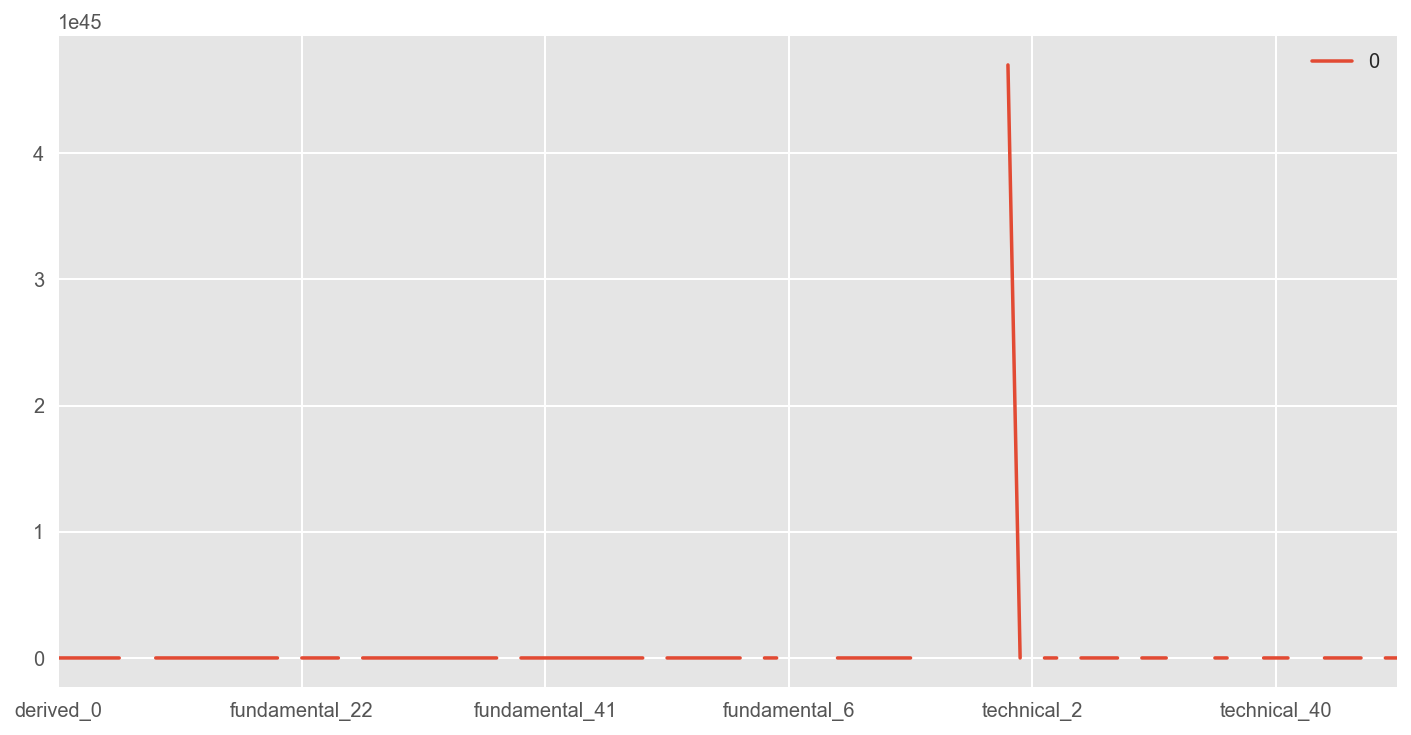

In [15]:
df1 = id_gp.get_group(6).iloc[2:,:]/id_gp.get_group(6).iloc[2:,:].max().dropna()
pd.DataFrame(df1.sum()).replace([np.inf, -np.inf], np.nan).plot(figsize=default_figsize)

In [151]:
time_gp = df.groupby('timestamp')

In [152]:
time_gp.keys

'timestamp'

In [20]:
newdf = df[['timestamp','id','y']].copy()
pivot_table = newdf.pivot('timestamp','id')
pivot_table

y                                                          \
id           0       6       7       10      11      12      13      14     
timestamp                                                                   
0             NaN     NaN     NaN  -11.8m   -1.2m  -20.9m     NaN     NaN   
1             NaN     NaN     NaN    5.9m   -2.0m  -20.1m     NaN     NaN   
2             NaN     NaN     NaN -476.5u    8.8m   29.3m     NaN     NaN   
3             NaN     NaN     NaN    5.2m   -6.6m   21.3m     NaN     NaN   
4             NaN     NaN     NaN  -77.2m   -4.3m  -26.9m     NaN     NaN   
5             NaN     NaN     NaN    6.1m  -22.7m    4.2m     NaN     NaN   
6             NaN     NaN     NaN  -27.7m  -35.7m    3.8m     NaN     NaN   
7             NaN     NaN     NaN  -33.3m  -24.8m   12.7m     NaN     NaN   
8             NaN     NaN     NaN   -2.2m   22.3m  -13.7m     NaN     NaN   
9             NaN     NaN     NaN   67.1m    6.7m   17.1m     NaN     NaN   
10            NaN     NaN     NaN   -5.4m   43.8m   -4.0m     NaN     NaN   
11            NaN     NaN     NaN  -11.7m   -1.3m  -14.6m     NaN     NaN   
12            NaN     NaN     NaN  -29.2m   -8.2m   -9.8m     NaN     NaN   
13            NaN     NaN     NaN    1.1m    6.3m   17.1m     NaN     NaN   
14            NaN     NaN     NaN   -5.2m   -2.8m   32.5m     NaN     NaN   
15            NaN     NaN     NaN  -86.1m   15.9m  -19.7m     NaN     NaN   
16            NaN     NaN     NaN  -68.4m   12.6m    2.1m     NaN     NaN   
17            NaN     NaN     NaN    4.5m   -5.5m   -3.3m     NaN     NaN   
18            NaN     NaN     NaN   42.2m   -6.9m -915.8u     NaN     NaN   
19            NaN     NaN     NaN    3.1m  -11.0m  -32.7m     NaN     NaN   
20            NaN     NaN     NaN    5.1m   -2.1m   14.7m     NaN     NaN   
21            NaN     NaN     NaN  -70.1m    5.3m   -5.1m     NaN     NaN   
22            NaN     NaN     NaN  -14.7m  -26.2m   -5.9m     NaN     NaN   
23            NaN     NaN     NaN  -23.0m  -42.9m   -5.1m     NaN     NaN   
24            NaN     NaN     NaN   -2.0m    4.5m  -21.5m     NaN     NaN   
25            NaN     NaN     NaN    6.5m  -18.3m    5.4m     NaN     NaN   
26            NaN     NaN     NaN  -14.6m    8.6m    3.7m     NaN     NaN   
27            NaN     NaN     NaN   14.0m  -15.2m   -8.2m     NaN     NaN   
28            NaN     NaN     NaN   -1.2m   -6.6m   32.6m     NaN     NaN   
29            NaN     NaN     NaN  -22.1m   -8.1m   -4.7m     NaN     NaN   
...           ...     ...     ...     ...     ...     ...     ...     ...   
1783       -11.4m  -13.9m  854.2u     NaN   -1.2m    7.6m   31.0m   29.3m   
1784        12.0m   -5.7m   10.8m     NaN    7.2m   11.3m   21.0m   17.8m   
1785        20.3m    4.4m    3.6m     NaN    6.3m    8.9m   22.6m  -28.0m   
1786        48.1m   -2.9m    5.6m     NaN  -11.4m  341.7u   21.6m   11.7m   
1787       -14.4m   -1.5m    3.5m     NaN    6.4m   -2.0m  -14.9m   -2.4m   
1788        -5.0m   -6.3m   18.0m     NaN   -1.9m -282.5u   -1.1m   -3.6m   
1789         1.8m   -5.4m   12.8m     NaN -201.5u   -1.2m  -26.2m  -13.1m   
1790         3.4m   -2.2m   -1.9m     NaN   -1.1m  622.5u  -11.6m  972.4u   
1791        -4.3m    8.1m   19.1m     NaN   -4.8m    1.2m  -20.8m   12.2m   
1792        -6.9m   -6.4m  -28.8m     NaN   -2.8m    4.3m   36.4m    7.4m   
1793        -5.0m -226.4u   45.6m     NaN    1.3m    3.6m  -15.8m   -5.1m   
1794        -2.8m  -10.2m   -5.1m     NaN   -4.4m   -5.3m  -26.0m  653.2u   
1795      -695.1u  505.2u  -41.0m     NaN  700.4u -603.5u   13.0m   -5.4m   
1796         2.2m    7.0m  -25.6m     NaN    2.3m    6.4m    6.5m   -9.5m   
1797      -972.2u -164.3u  561.7u     NaN  769.2u   -3.0m  622.9u  817.0u   
1798         2.5m   15.2m  -19.6m     NaN   -2.1m   -7.5m   -7.3m -296.5u   
1799        -1.5m    1.4m   -7.9m     NaN  -12.4m    4.3m  -14.1m  -35.0m   
1800       -14.5m   -3.1m  -33.1m     NaN   -7.8m   -3.1m  -47.2m   10.8m   
1801        

/Users/yunyang/anaconda/lib/python2.7/site-packages/seaborn-0.7.0-py2.7.egg/seaborn/matrix.py:134: DeprecationWarning:

elementwise == comparison failed; this will raise an error in the future.

/Users/yunyang/anaconda/lib/python2.7/site-packages/seaborn-0.7.0-py2.7.egg/seaborn/matrix.py:142: DeprecationWarning:

elementwise == comparison failed; this will raise an error in the future.



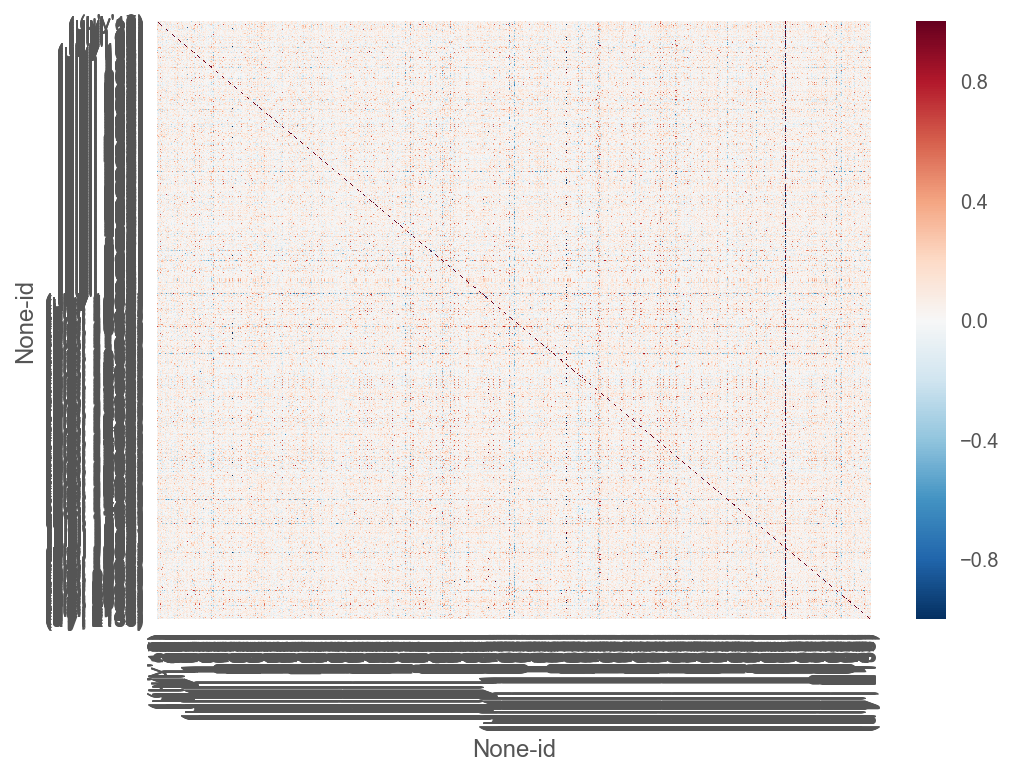

In [21]:
corr = pivot_table.corr(method='spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
corr_new = corr.copy()
corr_new.columns = range(len(corr.columns.tolist()))
corr_new.index = range(len(corr.columns.tolist()))
corr_new > 0.9

0      1      2      3      4      5      6      7      8      9     \
0      True  False  False  False  False  False  False  False  False  False   
1     False   True  False  False  False  False  False  False  False  False   
2     False  False   True  False  False  False  False  False  False  False   
3     False  False  False   True  False  False  False  False  False  False   
4     False  False  False  False   True  False  False  False  False  False   
5     False  False  False  False  False   True  False  False  False  False   
6     False  False  False  False  False  False   True  False  False  False   
7     False  False  False  False  False  False  False   True  False  False   
8     False  False  False  False  False  False  False  False   True  False   
9     False  False  False  False  False  False  False  False  False   True   
10    False  False  False  False  False  False  False  False  False  False   
11    False  False  False  False  False  False  False  False  False  False   
12    False  False  False  False  False  False  False  False  False  False   
13    False  False  False  False  False  False  False  False  False  False   
14    False  False  False  False  False  False  False  False  False  False   
15    False  False  False  False  False  False  False  False  False  False   
16    False  False  False  False  False  False  False  False  False  False   
17    False  False  False  False  False  False  False  False  False  False   
18    False  False  False  False  False  False  False  False  False  False   
19    False  False  False  False  False  False  False  False  False  False   
20    False  False  False  False  False  False  False  False  False  False   
21    False  False  False  False  False  False  False  False  False  False   
22    False  False  False  False  False  False  False  False  False  False   
23    False  False  False  False  False  False  False  False  False  False   
24    False  False  False  False  False  False  False  False  False  False   
25    False  False  False  False  False  False  False  False  False  False   
26    False  False  False  False  False  False  False  False  False  False   
27    False  False  False  False  False  False  False  False  False  False   
28    False  False  False  False  False  False  False  False  False  False   
29    False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1394  False  False  False  False  False  False  False  False  False  False   
1395  False  False  False  False  False  False  False  False  False  False   
1396  False  False  False  False  False  False  False  False  False  False   
1397  False  False  False  False  False  False  False  False  False  False   
1398  False  False  False  False  False  False  False  False  False  False   
1399  False  False  False  False  False  False  False  False  False  False   
1400  False  False  False  False  False  False  False  False  False  False   
1401  False  False  False  False  False  False  False  False  False  False   
1402  False  False  False  False  False  False  False  False  False  False   
1403  False  False  False  False  False  False  False  False  False  False   
1404  False  False  False  False  False  False  False  False  False  False   
1405  False  False  False  False  False  False  False  False  False  False   
1406  False  False  False  False  False  False  False  False  False  False   
1407  False  False  False  False  False  False  False  False  False  False   
1408  False  False  False  False  False  False  False  False  False  False   
1409  False  False  False  False  False  False  False  False  False  False   
1410  False  False  False  False  False  False  False  False  False  False   
1411  False  False  False  False  False  False  False  False  False  False   
1412  False  False  False  False  False  False  False  False  False  False   
1413  False  False  False  Fa

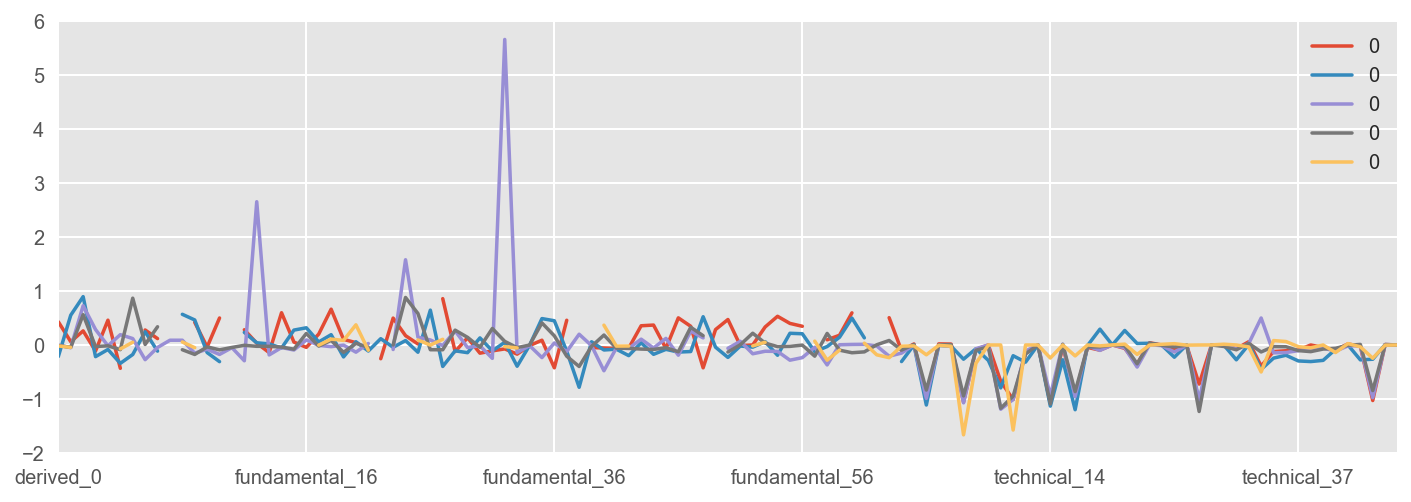

In [25]:
ax = pd.DataFrame(id_gp.get_group(6).sum()/len(id_gp.get_group(6))).iloc[2:,:].plot(figsize=(12,4))
pd.DataFrame(id_gp.get_group(7).sum()/len(id_gp.get_group(7))).iloc[2:,:].plot(figsize=(12,4),ax=ax)
pd.DataFrame(id_gp.get_group(11).sum()/len(id_gp.get_group(11))).iloc[2:,:].plot(figsize=(12,4),ax=ax)
pd.DataFrame(id_gp.get_group(12).sum()/len(id_gp.get_group(12))).iloc[2:,:].plot(figsize=(12,4),ax=ax)
pd.DataFrame(id_gp.get_group(13).sum()/len(id_gp.get_group(13))).iloc[2:,:].plot(figsize=(12,4),ax=ax)

In [28]:
# Interactive plot
t1_df = pd.DataFrame(id_gp.get_group(6).sum()/len(id_gp.get_group(6))).iloc[2:,:]
t2_df = pd.DataFrame(id_gp.get_group(7).sum()/len(id_gp.get_group(7))).iloc[2:,:]
t3_df = pd.DataFrame(id_gp.get_group(11).sum()/len(id_gp.get_group(11))).iloc[2:,:]
t4_df = pd.DataFrame(id_gp.get_group(12).sum()/len(id_gp.get_group(12))).iloc[2:,:]
t5_df = pd.DataFrame(id_gp.get_group(13).sum()/len(id_gp.get_group(13))).iloc[2:,:]


bigt_df = pd.concat([t1_df,t2_df,t3_df,t4_df,t5_df],axis=1)
bigt_df.columns = [1,2,3,4,5]
bigt_df.iplot()
